In [1]:
import vaex
import os
import numpy as np
import pandas as pd 
import sys
import matplotlib.pyplot as plt

In [4]:
current_dir  = os.getcwd()
ticker_name = "AAPL.OQ-2010"
#We assume that the data for the specific ticker is already cleaned
loading_dir = os.path.join(current_dir,"data","clean",
                            "flash_crash")

plots_dir = os.path.join(current_dir,"plots","flash_crash",
                        ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df=vaex.open(os.path.join(file_dir,file_name))
df

#,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume,index
0,nan,nan,213.32,1.0,213.42,1.0,2010-01-04 14:30:00.000999936
1,nan,nan,213.37,1.0,213.5,3.0,2010-01-04 14:30:00.009000192
2,nan,nan,213.38,2.0,213.5,1.0,2010-01-04 14:30:00.020000
3,nan,nan,213.39,1.0,213.5,1.0,2010-01-04 14:30:00.042000128
4,nan,nan,213.4,1.0,213.5,1.0,2010-01-04 14:30:00.087999744
...,...,...,...,...,...,...,...
"32,198,847",322.49,100.0,322.48,24.0,322.49,26.0,2010-12-31 20:59:59.733999872
"32,198,848",nan,nan,322.48,24.0,322.49,16.0,2010-12-31 20:59:59.786999552
"32,198,849",322.49,1600.0,322.48,24.0,322.66,41.0,2010-12-31 20:59:59.798999552
"32,198,850",322.49,1093.0,nan,nan,nan,nan,2010-12-31 20:59:59.808000


#### Initial Inspection:        
Plan :       

1-Time evolution of each column    
2-First stylized facts of the variables

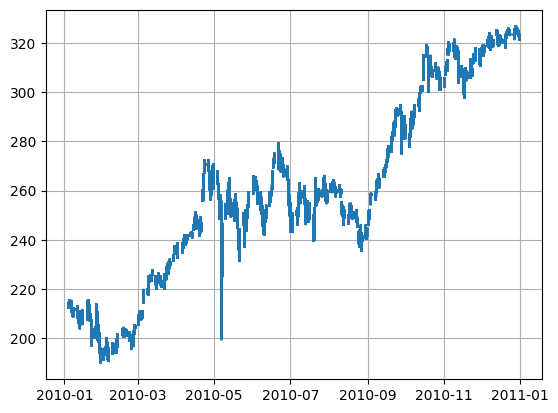

In [5]:
##Adapting the time zone to America/New York
index_series = pd.DatetimeIndex(df['index'].values)

# Convert timezone to America/New_York
index_series = index_series.tz_localize('UTC').tz_convert('America/New_York')
plt.plot(index_series,df['trade_price'].values)
plt.grid()

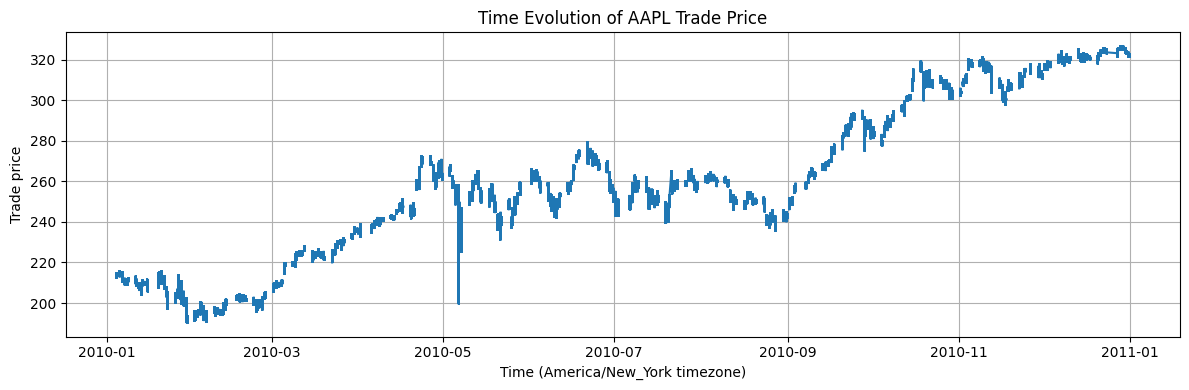

CPU times: user 2min 4s, sys: 6.71 s, total: 2min 11s
Wall time: 2min 9s


In [10]:
%%time 
graphs.plotYvsX(index_series, df['trade_price'].values,
                'Time (America/New_York timezone)','Trade price',
                f'Time Evolution of AAPL Trade Price',plots_dir)

#### Remarks : 

- Since the data is too long, it takes some time to plot the graph.
- The small gaps is due to the time between closing and opening hours for which there are no trades. 

We can see clearly from the graph the abrupt drop in the stock price: This happened in the beginning of May month, the Flash crahs is known at the date : The May 6, 2010, flash crash also known as the crash of 2:45 

### Analysing the flash crash day  
#### Trade price


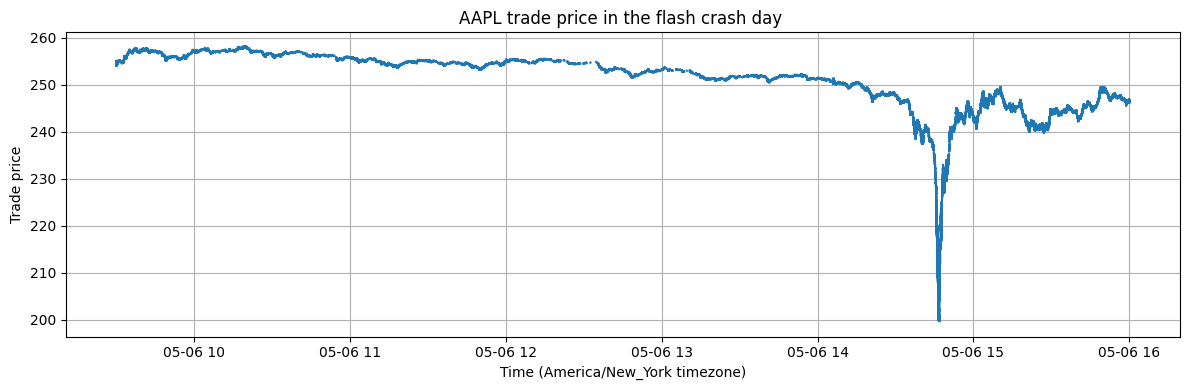

In [37]:
start_date = '2010-05-06'
end_date = '2010-05-07'
filtered_df = df[(df['index'] >= start_date) & (df['index'] <= end_date)]
filtered_index_series = index_series[(index_series >= start_date) & (index_series <= end_date)]
graphs.plotYvsX(filtered_index_series, filtered_df['trade_price'].values,
                'Time (America/New_York timezone)','Trade price',
                f'AAPL trade price in the flash crash day ',plots_dir)

#### We can see clearly that the crash happened around 2Pm :45   
#### Trade volume    


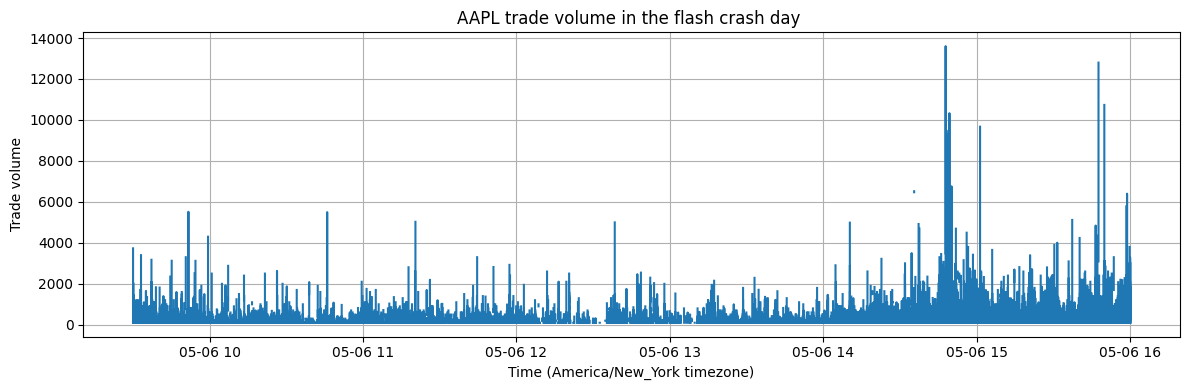

In [39]:
graphs.plotYvsX(filtered_index_series, filtered_df['trade_volume'].values,
                'Time (America/New_York timezone)','Trade volume',
                f'AAPL trade volume in the flash crash day ',plots_dir)

#### Discussion: We notice that the volume trade shows a strange fact : Unsuprisingly in at the time of flash, there was a very high volume being traded (Logically people selling their stocks). 
But there are also another peak  of the same level roughly that happened during the closing price hour. 

Is that a coincidence ? 

#### Ask Price 

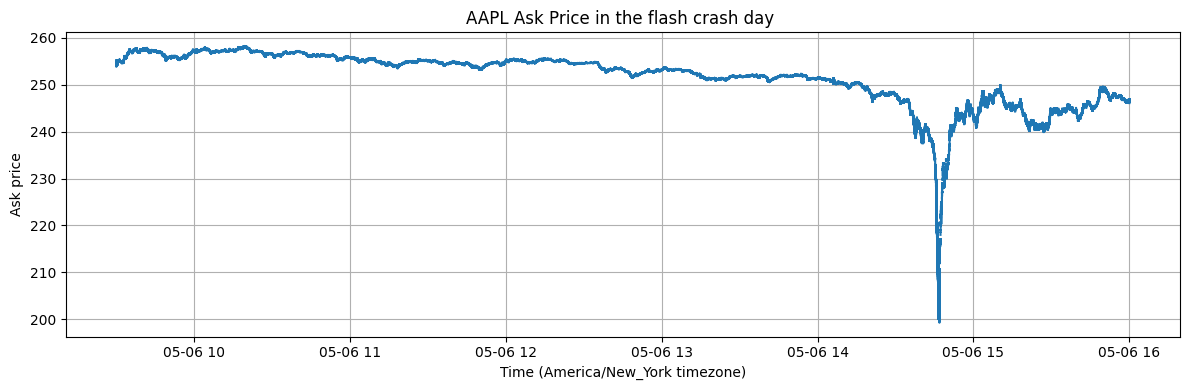

In [40]:
graphs.plotYvsX(filtered_index_series, filtered_df['ask-price'].values,
                'Time (America/New_York timezone)','Ask price',
                f'AAPL Ask Price in the flash crash day ',plots_dir)

#### Bid Price 

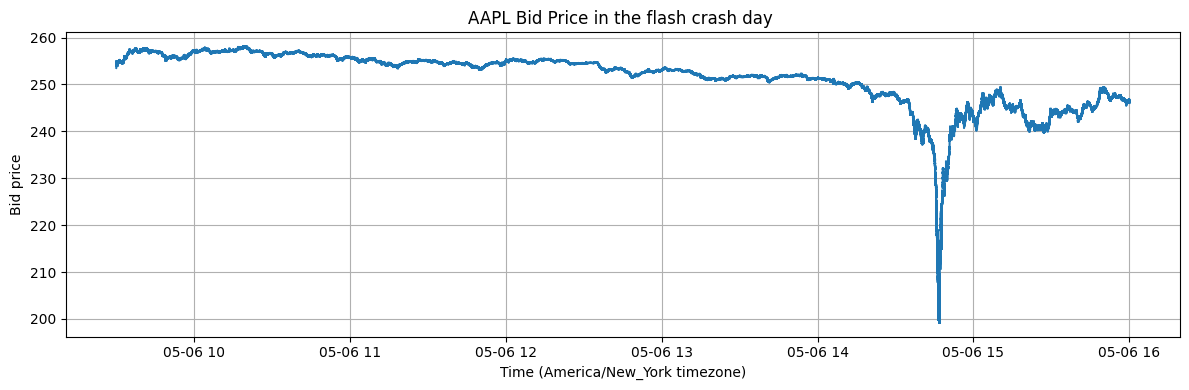

In [41]:
graphs.plotYvsX(filtered_index_series, filtered_df['bid-price'].values,
                'Time (America/New_York timezone)','Bid price',
                f'AAPL Bid Price in the flash crash day ',plots_dir)

#### Spread

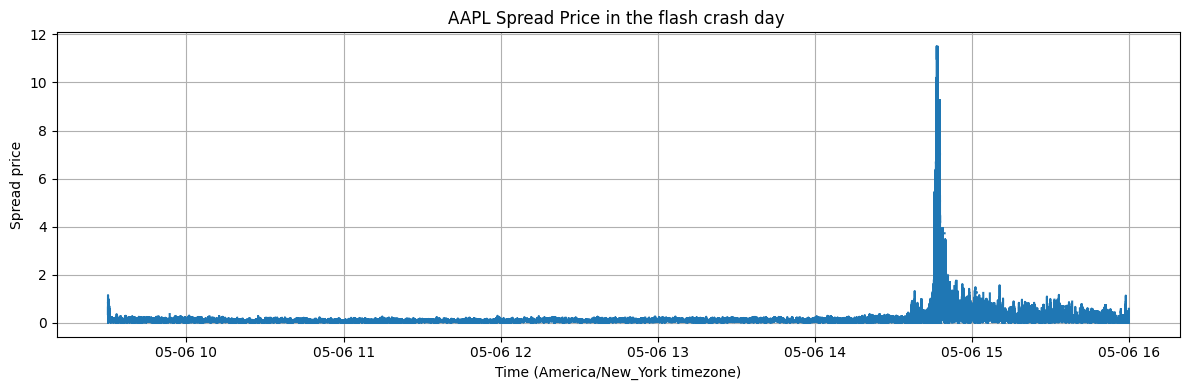

In [45]:
graphs.plotYvsX(filtered_index_series,
                np.array(filtered_df['ask-price'].values)- np.array(filtered_df['bid-price'].values),
                'Time (America/New_York timezone)','Spread price',
                f'AAPL Spread Price in the flash crash day ',plots_dir)

#### Discussion : 
Both Bid and Ask price seems to follow closely the trade price, the spread is almost zero during the day,  except during the crash where there is a small gap : 12$ between the ask and bid, this is insignifcant as it represents around  than 5% of the the trade price 

#### Ask volume 

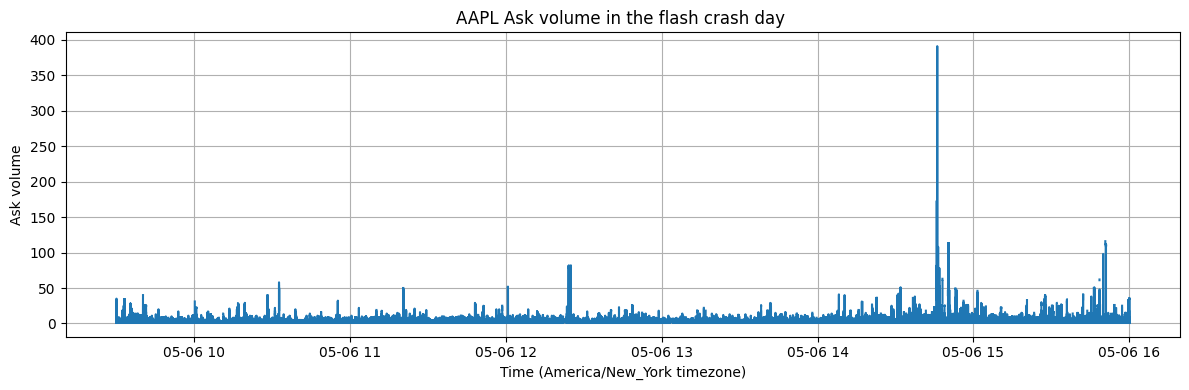

In [46]:
graphs.plotYvsX(filtered_index_series, filtered_df['ask-volume'].values,
                'Time (America/New_York timezone)','Ask volume',
                f'AAPL Ask volume in the flash crash day ',plots_dir)

### Bid volume 

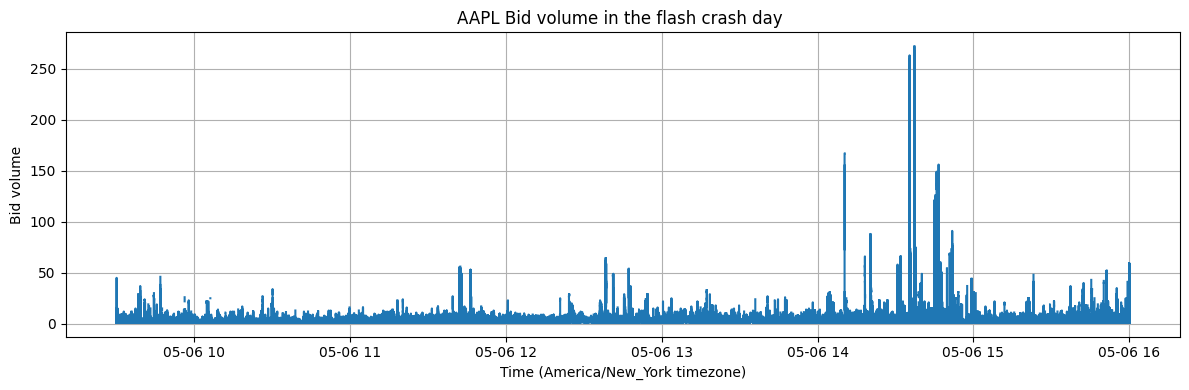

In [47]:
graphs.plotYvsX(filtered_index_series, filtered_df['bid-volume'].values,
                'Time (America/New_York timezone)','Bid volume',
                f'AAPL Bid volume in the flash crash day ',plots_dir)

#### Discussion : 
Ask volume represents a peak at the flash crash, otherwise it is quite stable during that day, while for bid volume, there are more peaks shown in the graph, and even during the flash hour, the peaks are higher compared to ask volume peak. 

#### Intraday Results  of the flash crash day vs a normal day:      
1-Number of trades  per 5 min during the day of the Crahs 

In [34]:
start_date = '2010-05-06'
end_date = '2010-05-07'
df_crash = (df[(df['index'] >= start_date) & 
               (df['index'] <= end_date)]).to_pandas_df()
crash_index = index_series[(index_series >= 
                            start_date) &(index_series <= end_date)]
df_crash['index'] = crash_index
df_crash.set_index('index',inplace = True)
start_date = "2010-02-03"
end_date = "2010-02-04"
df_normal = (df[(df['index'] >= start_date) & 
               (df['index'] <= end_date)]).to_pandas_df()
normal_index = index_series[(index_series >= 
                            start_date) &(index_series <= end_date)]
df_normal['index'] = normal_index
df_normal.set_index('index',inplace= True)

In [35]:
df_normal.head(3)

,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume
index,,,,,,
2010-02-03 09:30:00.013999616-05:00,NaN,NaN,194.61,2.0,195.26,1.0
2010-02-03 09:30:00.015000576-05:00,NaN,NaN,194.94,1.0,195.37,3.0
2010-02-03 09:30:00.031999488-05:00,NaN,NaN,194.61,2.0,195.37,3.0


In [36]:
df_crash.head(3)

,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume
index,,,,,,
2010-05-06 09:30:00.048000768-04:00,NaN,NaN,253.53,6.0,254.17,8.0
2010-05-06 09:30:00.101999872-04:00,NaN,NaN,253.53,6.0,254.15,5.0
2010-05-06 09:30:00.134000128-04:00,NaN,NaN,253.53,6.0,253.89,1.0


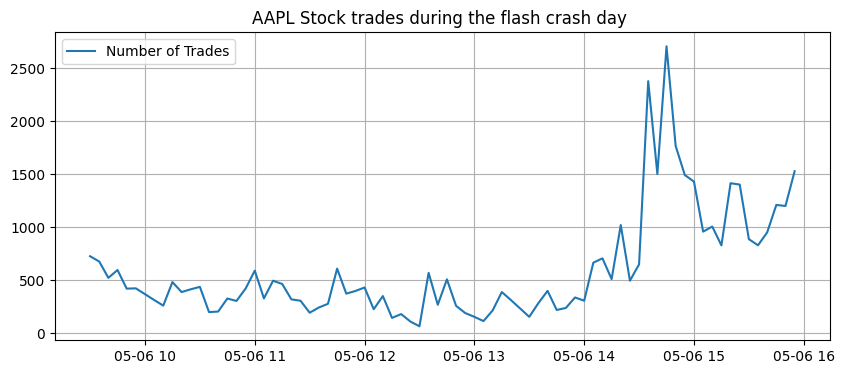

In [46]:
trade_counts = df_crash['trade_price'].notna().resample('5T').sum()
graphs.snsPlotVariation(trade_counts,
                        "Number of Trades",
                        "AAPL Stock trades during the flash crash day ")

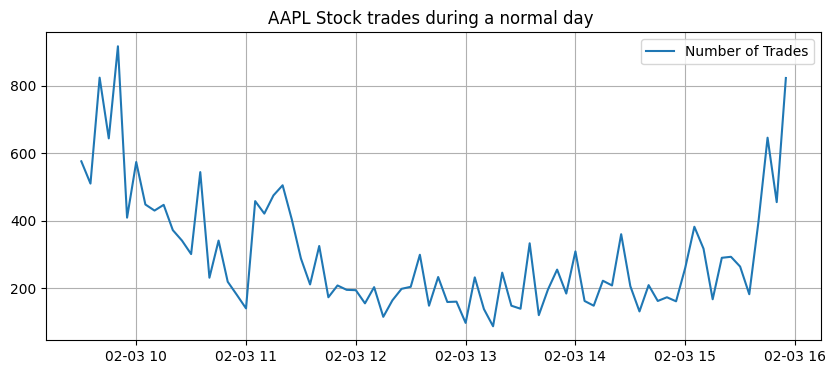

In [47]:

trade_counts = df_normal['trade_price'].notna().resample('5T').sum()
# Plotting
graphs.snsPlotVariation(trade_counts,
                        "Number of Trades",
                        "AAPL Stock trades during a normal day ")

#### Time between transactions: 

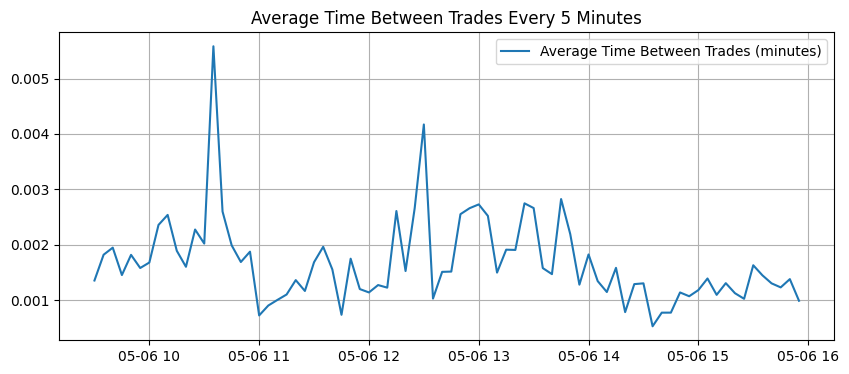

In [51]:
# Calculate time differences between consecutive transactions
df_crash['time_diff'] = df_crash.index.to_series().diff()
# Filter out the rows where no trade occurred
df_trade_only = df_crash[df_crash['trade_price'].notna()]
# Resample to 5-minute intervals and compute the average of 'time_diff'
average_time_diff = df_trade_only['time_diff'].resample('5T').mean()
average_time_diff_in_minutes = average_time_diff.dt.total_seconds() / 60  # Convert to minutes

# Plotting
graphs.snsPlotVariation(average_time_diff_in_minutes,
                       "Average Time Between Trades (minutes)",
                       "Average Time Between Trades Every 5 Minutes")

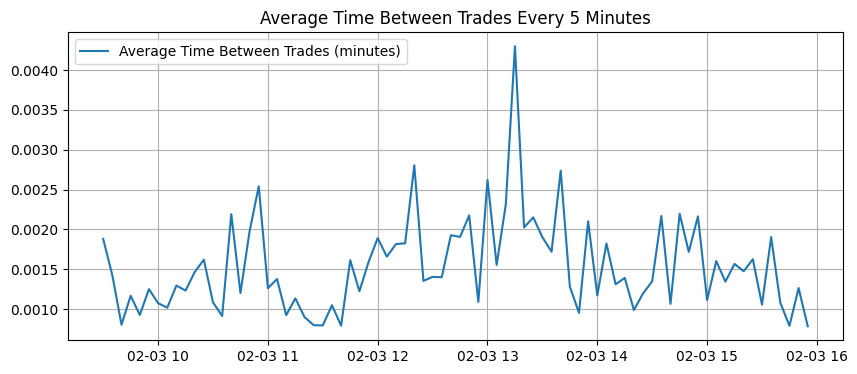

In [52]:
# Calculate time differences between consecutive transactions
df_normal['time_diff'] = df_normal.index.to_series().diff()
# Filter out the rows where no trade occurred
df_trade_only = df_normal[df_normal['trade_price'].notna()]
# Resample to 5-minute intervals and compute the average of 'time_diff'
average_time_diff = df_trade_only['time_diff'].resample('5T').mean()
average_time_diff_in_minutes = average_time_diff.dt.total_seconds() / 60  # Convert to minutes

# Plotting
graphs.snsPlotVariation(average_time_diff_in_minutes,
                       "Average Time Between Trades (minutes)",
                       "Average Time Between Trades Every 5 Minutes")

#### Trade classification: Using Lee-Ready algo

In [56]:
## Creating the mid price column: 
df['mid_price'] = (df['ask-price'] + df['bid-price']) / 2

In [86]:
start_date = '2010-05-06'
end_date = '2010-05-07'
df_crash = (df[(df['index'] >= start_date) & 
               (df['index'] <= end_date)]).to_pandas_df()
crash_index = index_series[(index_series >= 
                            start_date) &(index_series <= end_date)]
df_crash['index'] = crash_index
df_crash.set_index('index',inplace = True)
start_date = "2010-02-03"
end_date = "2010-02-04"
df_normal = (df[(df['index'] >= start_date) & 
               (df['index'] <= end_date)]).to_pandas_df()
normal_index = index_series[(index_series >= 
                            start_date) &(index_series <= end_date)]
df_normal['index'] = normal_index
df_normal.set_index('index',inplace= True)

In [71]:
import dataFrameInspection

In [77]:
dataFrameInspection.dataFrameinfo(df_crash)

Shape of Data frame is (198214, 7)
Type of columns is :  
trade_price     float64
trade_volume    float64
bid-price       float64
bid-volume      float64
ask-price       float64
ask-volume      float64
mid_price       float64
dtype: object
Total of NAs is: 
431988
trade_price     151954
trade_volume    151954
bid-price        25616
bid-volume       25616
ask-price        25616
ask-volume       25616
mid_price        25616
dtype: int64
Total Number of Infinite Values :
0


/Users/ilyesbenayed/Desktop/Big data/src/dataFrameInspection.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(df[i][0], float) or isinstance(df[i][0],int):


#### Discussion:    
The NA in trade price could be interpreted as no trade occuring, for bbo, we are going to replace the NA values with last bbo produced :  

In [87]:
# Apply forward fill only to specific columns
# Correct approach to apply forward fill only to specific columns
df_crash.loc[:, ['bid-price', 'bid-volume', 
                 'ask-price','ask-volume', 
                 'mid_price','prev_trade']] = df_crash[['bid-price','bid-volume',
                                                        'ask-price','ask-volume',
                                                        'mid_price',
                                                        'trade_price']].ffill()


In [88]:
# Create a column for the previous mid_price
df_crash['prev_mid_price']  = df_crash['mid_price'].shift(1)
df_crash['prev_trade']= df_crash['trade_price'].shift(1)
# Initialize trade_class with NaNs
df_crash['trade_class'] = np.nan

# Define a function to apply the logic for each row
def classify_trade(row):
    if pd.isna(row['trade_price']):
        return np.nan
    previous_mid_price = row['prev_mid_price']
    
    if row['trade_price'] > previous_mid_price:
        return 1  ## Buyer side 
    elif row['trade_price'] < previous_mid_price:
        return -1 ## Seller side 
    else:
        if row['trade_price'] > row['prev_trade']:
            return 1 
        else :
            return -1
        # Additional logic for trade_price == previous_mid_price
        # This part is tricky in Vaex and may require iterating or a different approach

# Apply the function to each row
df_crash['trade_class'] = df_crash.apply(classify_trade, axis=1)

In [91]:
df_crash.groupby('trade_class').count()

,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume,mid_price,prev_trade,prev_mid_price
trade_class,,,,,,,,,
-1.0,24406,24406,24406,24406,24406,24406,24406,8357,24406
1.0,21854,21854,21854,21854,21854,21854,21854,7639,21854


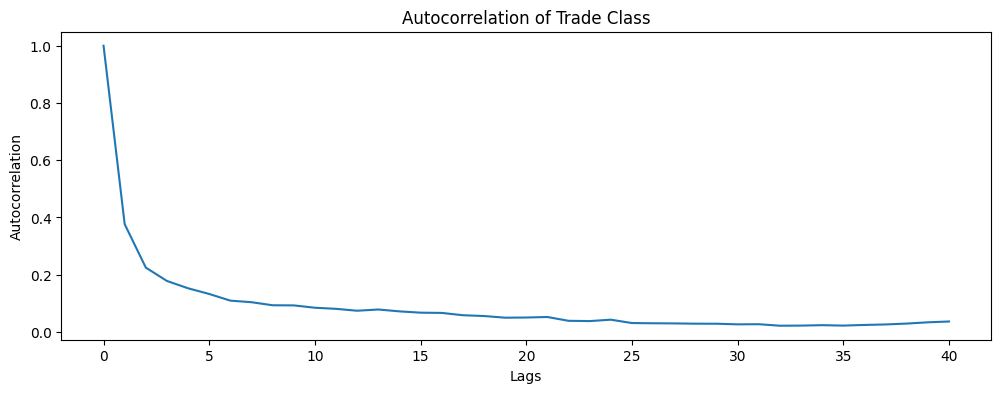

In [98]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'trade_class' is the column for autocorrelation analysis
# First, let's clean the data by dropping NaN values as autocorrelation
# requires non-null values
df_clean = df_crash.dropna(subset=['trade_class'])

# Check if there's enough data for autocorrelation analysis
if len(df_clean) < 2:
    print("Not enough data for autocorrelation analysis.")
else:
    # Calculate and plot autocorrelation for 'trade_class'
    acf_result = sm.tsa.acf(df_clean['trade_class'], nlags=40, fft=True)

    plt.figure(figsize=(12, 4))
    plt.plot(acf_result)
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation of Trade Class')
    plt.show()


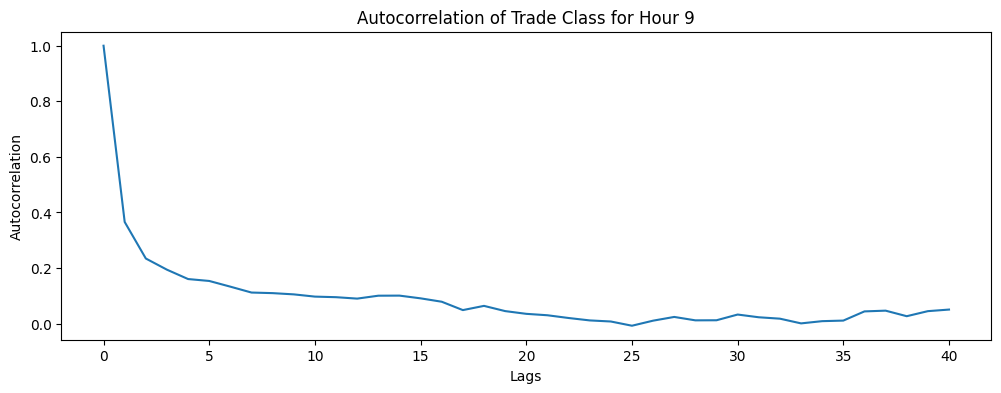

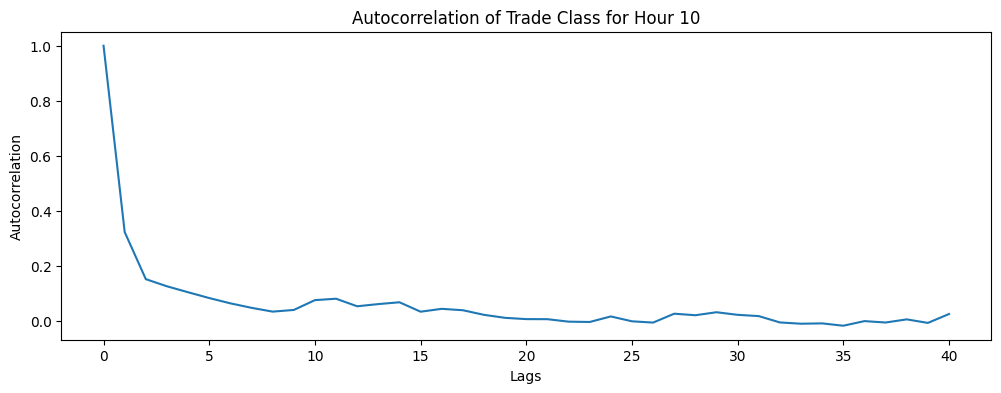

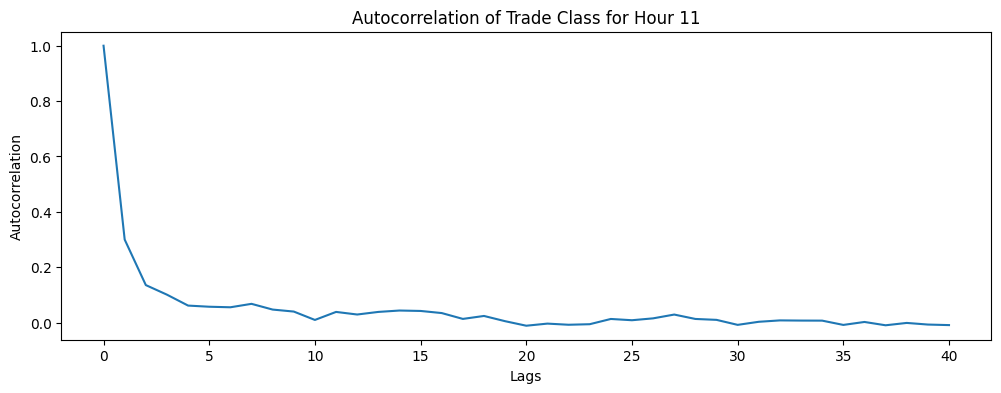

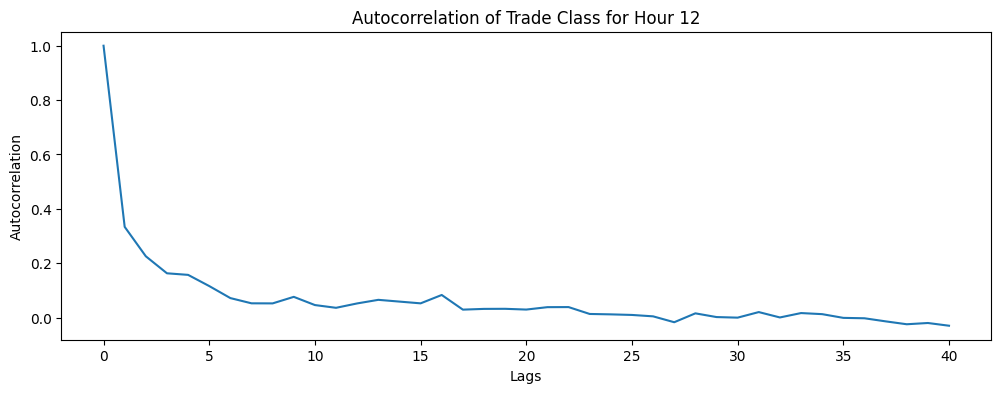

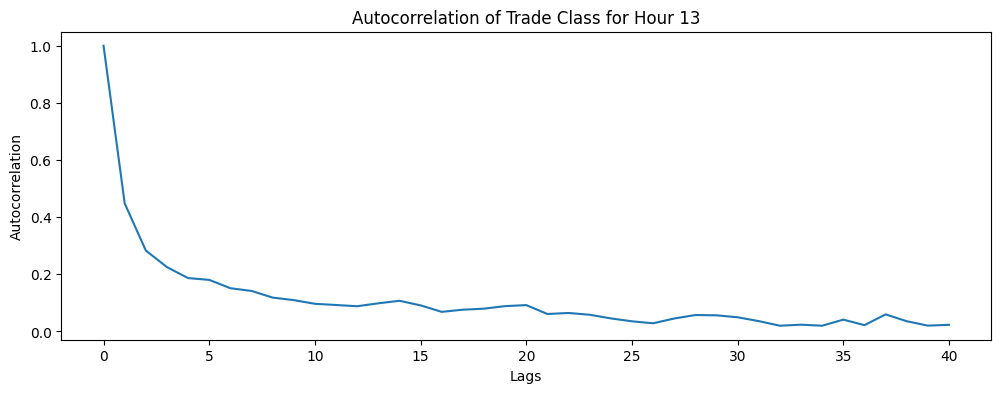

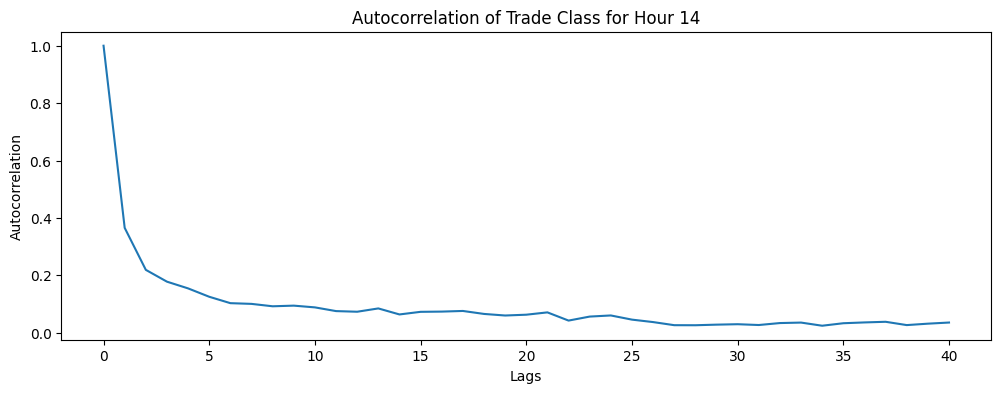

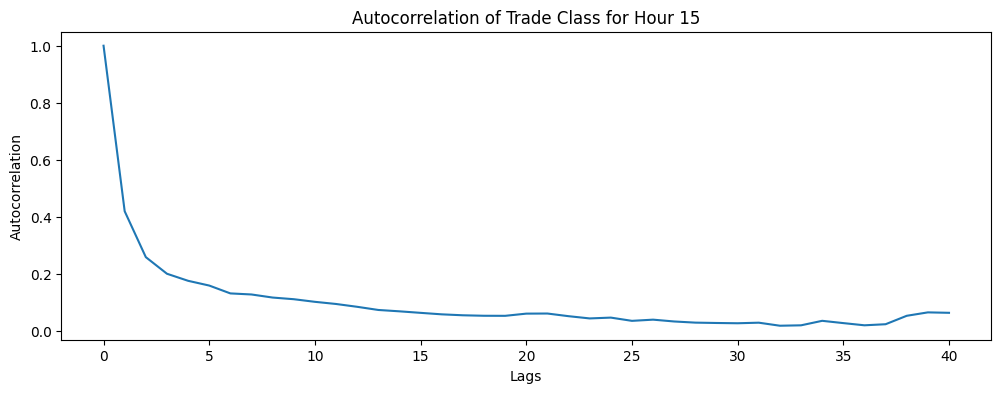

In [99]:
df_crash['hour'] = df_crash.index.hour

# Group the DataFrame by hour and compute autocorrelation for each group
for hour in df_crash['hour'].unique():
    df_hour = df_crash[df_crash['hour'] == hour]
    df_hour_clean = df_hour.dropna(subset=['trade_class'])
    
    if len(df_hour_clean) > 10:  # Check if there's enough data for autocorrelation analysis
        acf_result = sm.tsa.acf(df_hour_clean['trade_class'], nlags=40, fft=True)

        # Plot the autocorrelation
        plt.figure(figsize=(12, 4))
        plt.plot(acf_result)
        plt.xlabel('Lags')
        plt.ylabel('Autocorrelation')
        plt.title(f'Autocorrelation of Trade Class for Hour {hour}')
        plt.show()
    else:
        print(f"Not enough data for autocorrelation analysis for hour {hour}.")


In [96]:
df_crash.to_csv('test1.csv')

#### Bollinger bands 
#### RSI 